<a href="https://colab.research.google.com/github/HiyaJain22/Compute-Tasks/blob/main/Compute_SVM_Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Q1 Import and explore the data
Dataset Link: https://drive.google.com/file/d/1tPHOMKD_ef-j8MuynCn2fSpbrL11-J1l/view?usp=sharing


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as pltcolors
from sklearn import linear_model, svm, discriminant_analysis, metrics
from scipy import optimize
import seaborn as sns
import pandas as pd


In [ ]:
df=pd.read_table('/content/pulsar.txt',delimiter=',')
df

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,NaN,2.958066,7.197842,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0
...,...,...,...,...,...,...,...,...,...
12523,124.312500,53.179053,-0.012418,-0.556021,7.186455,29.308266,4.531382,21.725143,0.0
12524,115.617188,46.784600,0.218177,0.226757,6.140468,NaN,5.732201,34.357283,0.0
12525,116.031250,43.213846,0.663456,0.433088,0.785117,11.628149,17.055215,312.204325,0.0
12526,135.664062,49.933749,-0.089940,-0.226726,3.859532,21.501505,7.398395,62.334018,0.0


##Q2 Carry out data pre-processing

In [ ]:
df.isnull().sum()

 Mean of the integrated profile                     0
 Standard deviation of the integrated profile       0
 Excess kurtosis of the integrated profile       1735
 Skewness of the integrated profile                 0
 Mean of the DM-SNR curve                           0
 Standard deviation of the DM-SNR curve          1178
 Excess kurtosis of the DM-SNR curve                0
 Skewness of the DM-SNR curve                     625
target_class                                        0
dtype: int64

In [ ]:
df.dropna(axis=0,inplace=True)

In [ ]:
df.isnull().sum()

 Mean of the integrated profile                  0
 Standard deviation of the integrated profile    0
 Excess kurtosis of the integrated profile       0
 Skewness of the integrated profile              0
 Mean of the DM-SNR curve                        0
 Standard deviation of the DM-SNR curve          0
 Excess kurtosis of the DM-SNR curve             0
 Skewness of the DM-SNR curve                    0
target_class                                     0
dtype: int64

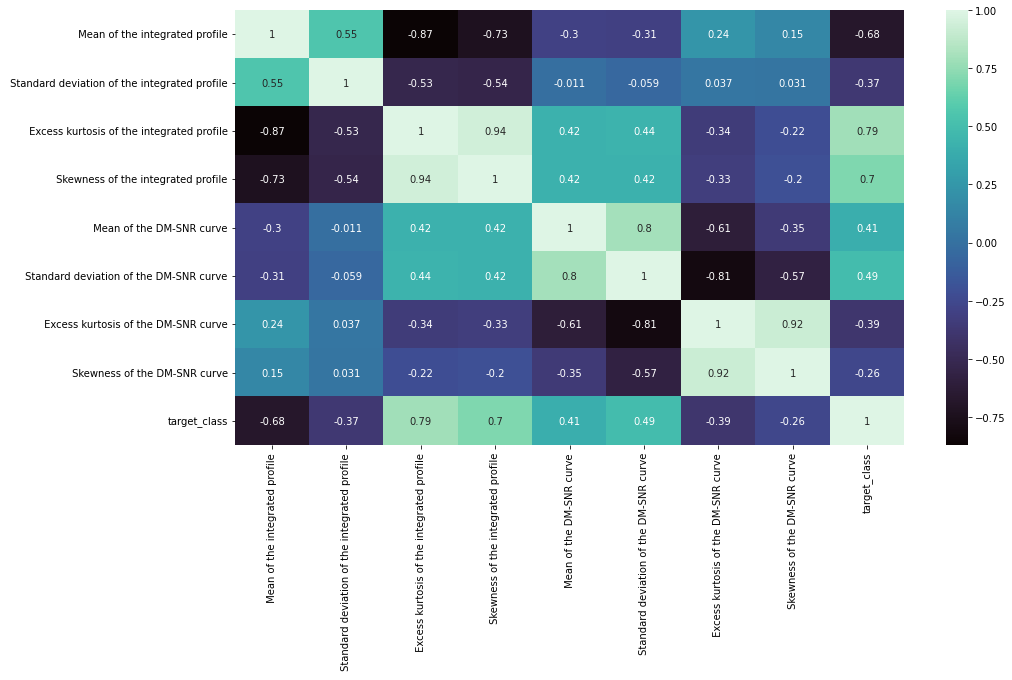

In [ ]:
corr=df.corr()
plt.figure(figsize=(15,8))
sns.heatmap(corr,annot=True,cmap='mako')

In [ ]:
corr

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
Mean of the integrated profile,1.000000,0.554197,-0.872497,-0.734920,-0.299984,-0.307431,0.236010,0.146103,-0.675819
Standard deviation of the integrated profile,0.554197,1.000000,-0.528370,-0.542560,-0.011061,-0.059486,0.036907,0.030959,-0.368223
Excess kurtosis of the integrated profile,-0.872497,-0.528370,1.000000,0.944715,0.421126,0.436362,-0.344571,-0.216748,0.790866
Skewness of the integrated profile,-0.734920,-0.542560,0.944715,1.000000,0.415570,0.415902,-0.328328,-0.204109,0.704743
Mean of the DM-SNR curve,-0.299984,-0.011061,0.421126,0.415570,1.000000,0.796449,-0.614526,-0.353186,0.407043
Standard deviation of the DM-SNR curve,-0.307431,-0.059486,0.436362,0.415902,0.796449,1.000000,-0.807013,-0.573260,0.493163
Excess kurtosis of the DM-SNR curve,0.236010,0.036907,-0.344571,-0.328328,-0.614526,-0.807013,1.000000,0.924326,-0.390352
Skewness of the DM-SNR curve,0.146103,0.030959,-0.216748,-0.204109,-0.353186,-0.573260,0.924326,1.000000,-0.258428
target_class,-0.675819,-0.368223,0.790866,0.704743,0.407043,0.493163,-0.390352,-0.258428,1.000000


##Q3 Scale the data using Standard Scaler

####Q3a According to you, why is scaling important in SVM? What are the different methods for scaling the data available in sklearn.preprocessing?

##Q4 Split the data in traina and test set

In [ ]:

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 101)


In [ ]:

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
     

##Q5 Implement SVM

Different types of kernels in SVM:
https://www.kaggle.com/discussions/questions-and-answers/326336


###Q5a Linear SVM

Apply Linear SVM for costs (C) = [0.1, 1, 10, 100, 1000], predict for the test set and check f1 score for each of the costs. State the best cost 

In [ ]:

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
param_grid = {'C': [0.1,1, 10, 100]} 
grid_search = GridSearchCV(estimator = classifier,
                           scoring='f1_micro',
                           param_grid = param_grid,
                           refit=2,
                           verbose=2)
grid_search.fit(X_train, y_train)
     

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END ..............................................C=0.1; total time=   0.1s
[CV] END ..............................................C=0.1; total time=   0.1s
[CV] END ..............................................C=0.1; total time=   0.1s
[CV] END ..............................................C=0.1; total time=   0.1s
[CV] END ..............................................C=0.1; total time=   0.1s
[CV] END ................................................C=1; total time=   0.1s
[CV] END ................................................C=1; total time=   0.1s
[CV] END ................................................C=1; total time=   0.1s
[CV] END ................................................C=1; total time=   0.1s
[CV] END ................................................C=1; total time=   0.1s
[CV] END ...............................................C=10; total time=   0.1s
[CV] END ........................................

GridSearchCV(estimator=SVC(kernel='linear', random_state=0),
             param_grid={'C': [0.1, 1, 10, 100]}, refit=2, scoring='f1_micro',
             verbose=2)

In [ ]:

pd.DataFrame(grid_search.cv_results_)
     

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.064941,0.011730,0.011464,0.001618,0.1,{'C': 0.1},0.979887,0.977474,0.978261,0.975845,0.976651,0.977624,0.001390,4
1,0.065009,0.004966,0.009565,0.000727,1,{'C': 1},0.980692,0.980692,0.979066,0.982287,0.979871,0.980522,0.001069,3
2,0.134111,0.009251,0.009786,0.001269,10,{'C': 10},0.981496,0.981496,0.980676,0.982287,0.982287,0.981648,0.000601,1
3,0.675801,0.053129,0.010836,0.003189,100,{'C': 100},0.981496,0.981496,0.979066,0.981481,0.982287,0.981165,0.001094,2


###Q5b Polynomial Kernel

Apply Linear SVM for degrees = [1,2,3,4,5], predict for the test set and check f1 score for each of the degrees. State the best degree. 

In [ ]:

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
classifier = SVC(kernel = 'poly', random_state = 0)
param_grid = {'degree': [1,2,3,4,5]} 
grid_search = GridSearchCV(estimator = classifier,
                           scoring='f1_micro',
                           param_grid = param_grid,
                           refit=2,
                           verbose=2)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END ...........................................degree=1; total time=   0.1s
[CV] END ...........................................degree=1; total time=   0.1s
[CV] END ...........................................degree=1; total time=   0.1s
[CV] END ...........................................degree=1; total time=   0.1s
[CV] END ...........................................degree=1; total time=   0.1s
[CV] END ...........................................degree=2; total time=   0.1s
[CV] END ...........................................degree=2; total time=   0.1s
[CV] END ...........................................degree=2; total time=   0.1s
[CV] END ...........................................degree=2; total time=   0.1s
[CV] END ...........................................degree=2; total time=   0.1s
[CV] END ...........................................degree=3; total time=   0.1s
[CV] END ........................................

GridSearchCV(estimator=SVC(kernel='poly', random_state=0),
             param_grid={'degree': [1, 2, 3, 4, 5]}, refit=2,
             scoring='f1_micro', verbose=2)

In [ ]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_degree,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.067746,0.010600,0.010965,0.000166,1,{'degree': 1},0.979887,0.977474,0.978261,0.975845,0.979066,0.978107,0.001388,1
1,0.091364,0.009613,0.013938,0.003197,2,{'degree': 2},0.979083,0.971842,0.970209,0.975040,0.972625,0.973760,0.003084,4
2,0.107127,0.008613,0.013144,0.003790,3,{'degree': 3},0.979887,0.974256,0.971014,0.979066,0.976651,0.976175,0.003246,2
3,0.308128,0.040348,0.021623,0.000618,4,{'degree': 4},0.981496,0.972647,0.970209,0.975040,0.972625,0.974404,0.003861,3
4,0.610098,0.119795,0.020667,0.000503,5,{'degree': 5},0.981496,0.972647,0.966989,0.972625,0.971820,0.973115,0.004689,5


###Q5c Sigmoid Kernel

Apply Linear SVM for costs (C) = [0.1, 1, 10, 100, 1000], predict for the test set and check f1 score for each of the costs. State the best cost 

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
classifier = SVC(kernel = 'sigmoid', random_state = 0)
param_grid = {'C': [0.1, 1, 10, 100, 1000]} 
grid_search = GridSearchCV(estimator = classifier,
                           scoring='f1_micro',
                           param_grid = param_grid,
                           refit=2,
                           verbose=2)
grid_search.fit(X_train, y_train)
     

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END ..............................................C=0.1; total time=   0.8s
[CV] END ..............................................C=0.1; total time=   0.6s
[CV] END ..............................................C=0.1; total time=   0.7s
[CV] END ..............................................C=0.1; total time=   0.6s
[CV] END ..............................................C=0.1; total time=   0.7s
[CV] END ................................................C=1; total time=   0.6s
[CV] END ................................................C=1; total time=   0.7s
[CV] END ................................................C=1; total time=   0.7s
[CV] END ................................................C=1; total time=   0.6s
[CV] END ................................................C=1; total time=   0.6s
[CV] END ...............................................C=10; total time=   0.6s
[CV] END ........................................

GridSearchCV(estimator=SVC(kernel='sigmoid', random_state=0),
             param_grid={'C': [0.1, 1, 10, 100, 1000]}, refit=2,
             scoring='f1_micro', verbose=2)

In [ ]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.579332,0.047881,0.101778,0.006379,0.1,{'C': 0.1},0.880933,0.866452,0.883253,0.868760,0.871981,0.874276,0.006660,1
1,0.508947,0.043705,0.105194,0.024387,1,{'C': 1},0.876911,0.862430,0.880837,0.864734,0.866345,0.870251,0.007257,3
2,0.548882,0.098134,0.123716,0.028455,10,{'C': 10},0.876911,0.861625,0.881643,0.864734,0.866345,0.870251,0.007671,2
3,0.550190,0.073076,0.119105,0.054501,100,{'C': 100},0.876911,0.861625,0.880837,0.864734,0.866345,0.870090,0.007435,4
4,0.295342,0.064565,0.057224,0.005291,1000,{'C': 1000},0.876911,0.861625,0.880837,0.864734,0.866345,0.870090,0.007435,4


###Q5d RBF Kernel

Apply Linear SVM for costs (C) = [0.1, 1, 10, 100, 1000], predict for the test set and check f1 score for each of the costs. State the best cost 

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
param_grid = {'C': [0.1, 1, 10, 100, 1000]} 
grid_search = GridSearchCV(estimator = classifier,
                           scoring='f1_micro',
                           param_grid = param_grid,
                           refit=2,
                           verbose=2)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END ..............................................C=0.1; total time=   0.2s
[CV] END ..............................................C=0.1; total time=   0.2s
[CV] END ..............................................C=0.1; total time=   0.2s
[CV] END ..............................................C=0.1; total time=   0.2s
[CV] END ..............................................C=0.1; total time=   0.2s
[CV] END ................................................C=1; total time=   0.2s
[CV] END ................................................C=1; total time=   0.1s
[CV] END ................................................C=1; total time=   0.1s
[CV] END ................................................C=1; total time=   0.2s
[CV] END ................................................C=1; total time=   0.1s
[CV] END ...............................................C=10; total time=   0.1s
[CV] END ........................................

GridSearchCV(estimator=SVC(random_state=0),
             param_grid={'C': [0.1, 1, 10, 100, 1000]}, refit=2,
             scoring='f1_micro', verbose=2)

In [ ]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.133271,0.005205,0.038415,0.001346,0.1,{'C': 0.1},0.978278,0.975060,0.971014,0.975845,0.973430,0.974726,0.002426,5
1,0.121793,0.020298,0.027856,0.001234,1,{'C': 1},0.980692,0.978278,0.976651,0.980676,0.981481,0.979556,0.001807,2
2,0.119259,0.007846,0.023626,0.000816,10,{'C': 10},0.981496,0.979887,0.977456,0.982287,0.980676,0.980360,0.001659,1
3,0.196249,0.017597,0.029824,0.006487,100,{'C': 100},0.981496,0.981496,0.978261,0.980676,0.975845,0.979555,0.002201,3
4,0.541587,0.060977,0.022337,0.000567,1000,{'C': 1000},0.978278,0.978278,0.974235,0.982287,0.975845,0.977785,0.002725,4
